In [123]:
import pandas as pd 
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm 
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pmdarima.arima.utils import ndiffs, nsdiffs
from matplotlib import pyplot as plt 
# metrics  
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import warnings 
warnings.filterwarnings(action='ignore')

In [170]:
link = "./dataset/hoboken.csv"
hoboken = pd.read_csv(link)
hoboscaler = MinMaxScaler()
hoboken.Date = pd.to_datetime(hoboken.Date)
hoboken = hoboken.set_index('Date')
hoboken[['Value']] = hoboscaler.fit_transform(hoboken[['Value']])
hoboken.head()

,Value
Date,
2015-01-31,0.000000
2015-02-28,0.027298
2015-03-31,0.039681
2015-04-30,0.049087
2015-05-31,0.066606


# sarimax for hoboken 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.47533D+00    |proj g|=  8.33139D+01

At iterate    5    f= -2.62580D+00    |proj g|=  5.14190D-01

At iterate   10    f= -2.65142D+00    |proj g|=  2.00839D+01

At iterate   15    f= -2.80499D+00    |proj g|=  5.63135D-01

At iterate   20    f= -2.82891D+00    |proj g|=  2.12542D+00

At iterate   25    f= -2.83496D+00    |proj g|=  5.41328D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     40      1     0     0   

 This problem is unconstrained.


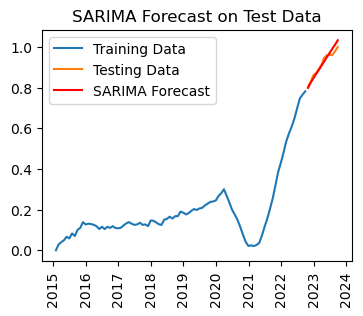

In [172]:
train_size = 93  
train, test = hoboken['Value'].iloc[:train_size],hoboken['Value'].iloc[train_size:]
sarima_model = SARIMAX(train, order=(4,2,2), seasonal_order=(0,0,0,12))
sarima_result = sarima_model.fit()

# predicting  
forecast_periods = len(test)
sarima_forecast = sarima_result.get_forecast(steps=forecast_periods)
forecast_values = sarima_forecast.predicted_mean

# Plotting
plt.figure(figsize=(4, 3))
plt.plot(train.index, train, label='Training Data')
plt.xticks(rotation='vertical')
plt.plot(test.index, test, label='Testing Data')
plt.plot(forecast_values.index, forecast_values, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast on Test Data')
plt.legend()
plt.show()


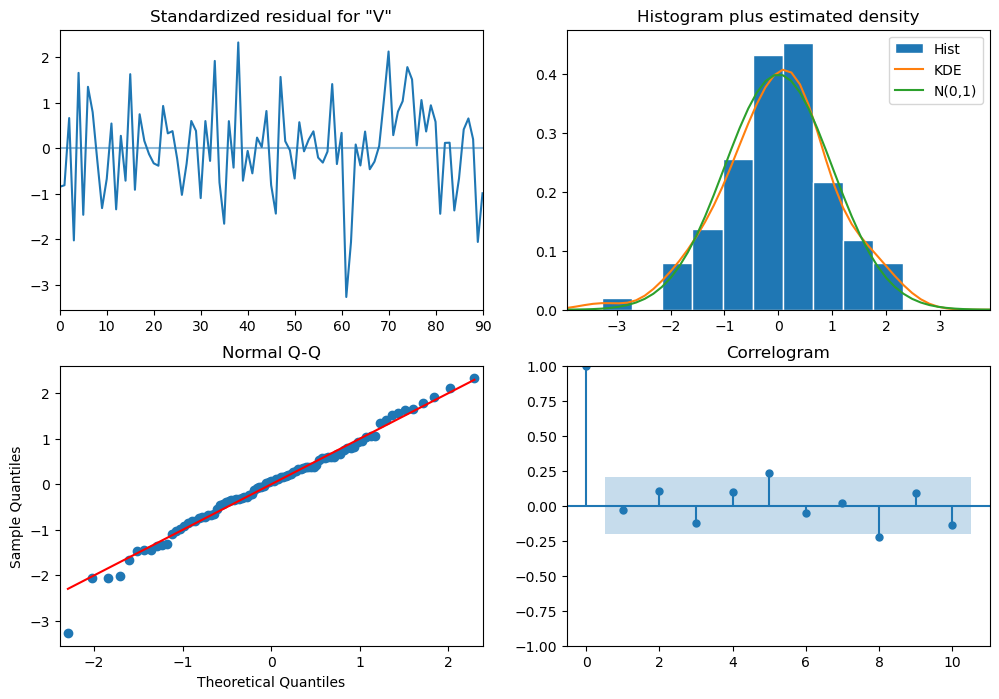

In [151]:
sarima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

In [141]:
print(f'the mean squared error is {mean_squared_error(test, forecast_values)}')
print(f'the r2 score is {r2_score(test, forecast_values)}')

the mean squared error is 0.00033158708392104513
the r2 score is 0.9083826560471159


# New york 

In [167]:
newyork = pd.read_csv('./dataset/new york.csv')
newyorkScaler = MinMaxScaler()
newyorkScaler.fit(newyork[['Value']])
newyork.Date = pd.to_datetime(newyork.Date)
newyork = newyork.set_index('Date')
#newyork[['Value']] = newyorkScaler.fit_transform(newyork[['Value']])
newyork.drop('index', axis=1, inplace=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36766D+00    |proj g|=  7.37914D-02


 This problem is unconstrained.



At iterate    5    f=  3.34697D+00    |proj g|=  1.94091D-02

At iterate   10    f=  3.33129D+00    |proj g|=  3.84002D-02

At iterate   15    f=  3.31117D+00    |proj g|=  5.34868D-02

At iterate   20    f=  3.30091D+00    |proj g|=  5.98075D-02

At iterate   25    f=  3.29630D+00    |proj g|=  1.75226D-02

At iterate   30    f=  3.29523D+00    |proj g|=  2.69130D-02

At iterate   35    f=  3.29480D+00    |proj g|=  2.98121D-02

At iterate   40    f=  3.29447D+00    |proj g|=  4.34291D-03

At iterate   45    f=  3.29443D+00    |proj g|=  1.60550D-03

At iterate   50    f=  3.29442D+00    |proj g|=  1.57524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

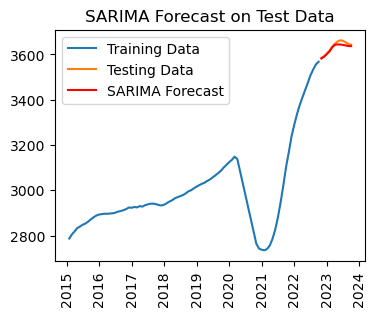

In [169]:
train_size = 93  
train, test = newyork['Value'].iloc[:train_size],newyork['Value'].iloc[train_size:]
sarima_model = SARIMAX(train, order=(4,2,4), seasonal_order=(2,0,5,12))
sarima_result = sarima_model.fit()

# Predicting 
forecast_periods = len(test)
sarima_forecast = sarima_result.get_forecast(steps=forecast_periods)
forecast_values = sarima_forecast.predicted_mean

# Plotting 
plt.figure(figsize=(4,3))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(forecast_values.index, forecast_values, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast on Test Data')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


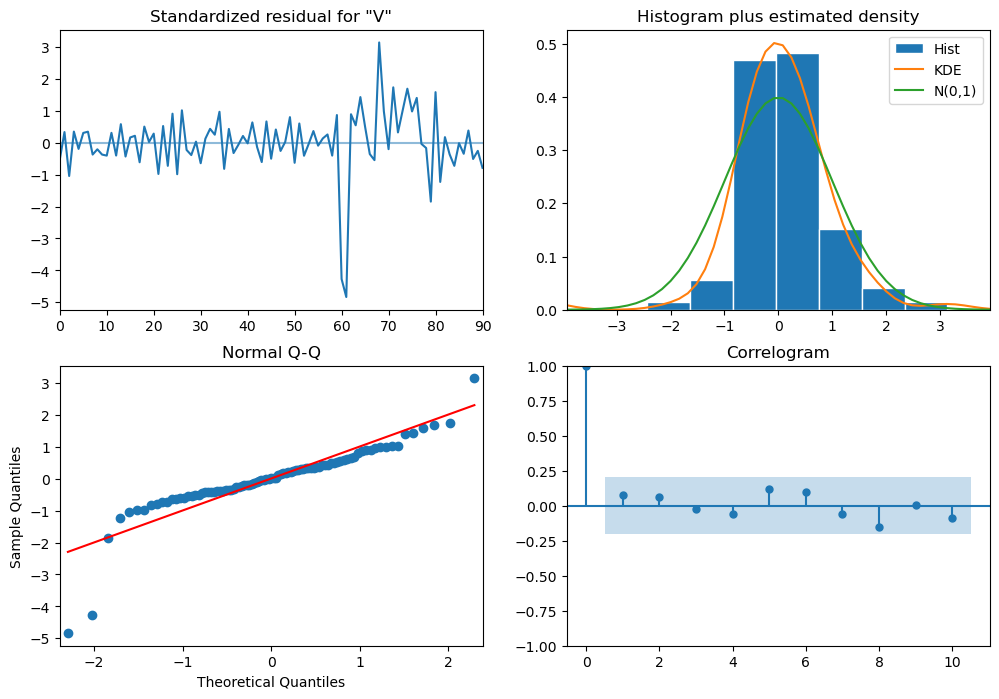

In [120]:
sarima_result.plot_diagnostics(figsize=(12, 8))
plt.show()

In [119]:
pred_normalised = newyorkScaler.transform(np.reshape(forecast_values,(-1,1)))
test_normalised = newyorkScaler.transform(np.reshape(test,(-1,1)))

print(f'the mean squared error is {mean_squared_error(test_normalised, pred_normalised)}')
print(f'the r2 score is {r2_score(test_normalised, pred_normalised)}')

the mean squared error is 0.00011654263998381803
the r2 score is 0.8528537420988462


# Sarima for Philly dataset

In [162]:
link = './dataset/philly.csv'
philly = pd.read_csv(link)
phillyscaler = MinMaxScaler()
phillyscaler.fit(philly[['Value']])
philly.Date = pd.to_datetime(philly.Date)
philly = philly.set_index('Date')
#philly[['Value']] = phillyscaler.fit_transform(philly[['Value']])

In [163]:
train_size = 93
train_philly, test_philly = philly['Value'].iloc[:train_size],philly['Value'].iloc[train_size:]

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.78869D+00    |proj g|=  6.55517D-01

At iterate    5    f=  2.34543D+00    |proj g|=  5.66141D-02

At iterate   10    f=  2.23228D+00    |proj g|=  7.33630D-02

At iterate   15    f=  2.22673D+00    |proj g|=  2.74913D-02

At iterate   20    f=  2.20357D+00    |proj g|=  3.52788D-02

At iterate   25    f=  2.17986D+00    |proj g|=  4.92011D-02

At iterate   30    f=  2.17811D+00    |proj g|=  1.55994D-02

At iterate   35    f=  2.17701D+00    |proj g|=  3.91047D-03

At iterate   40    f=  2.17656D+00    |proj g|=  2.03457D-02

At iterate   45    f=  2.17633D+00    |proj g|=  1.95132D-03

At iterate   50    f=  2.17616D+00    |proj g|=  1.38581D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

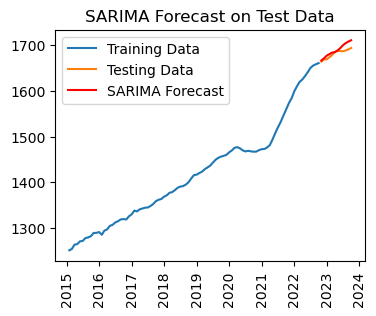

In [166]:
order = (4,4,2)
seasonal_order = (4,4,4,12)

# training
sarima_model = SARIMAX(train_philly, order =(1,2,4), seasonal_order = (0,2,2,12))
sarima_result = sarima_model.fit()

# Prediction
forecast_periods = len(test_philly)
sarima_forecast = sarima_result.get_forecast(steps=forecast_periods)
forecast_values_philly = sarima_forecast.predicted_mean

# Plotting 
plt.figure(figsize=(4, 3))
plt.plot(train_philly.index, train_philly, label='Training Data')
plt.plot(test_philly.index, test_philly, label='Testing Data')
plt.plot(test_philly.index, forecast_values_philly, label='SARIMA Forecast', color='red')
plt.xticks(rotation='vertical')
plt.title('SARIMA Forecast on Test Data')
plt.legend()
plt.show()

In [148]:
pred_normalised = phillyscaler.transform(np.reshape(forecast_values_philly,(-1,1)))
test_normalised = phillyscaler.transform(np.reshape(test_philly,(-1,1)))

print(f'the mean squared error is {mean_squared_error(test_normalised, pred_normalised)}')
print(f'the r2 score is {r2_score(test_philly, forecast_values_philly)}')

the mean squared error is 0.0005127953113112689
the r2 score is -0.12260188539506678


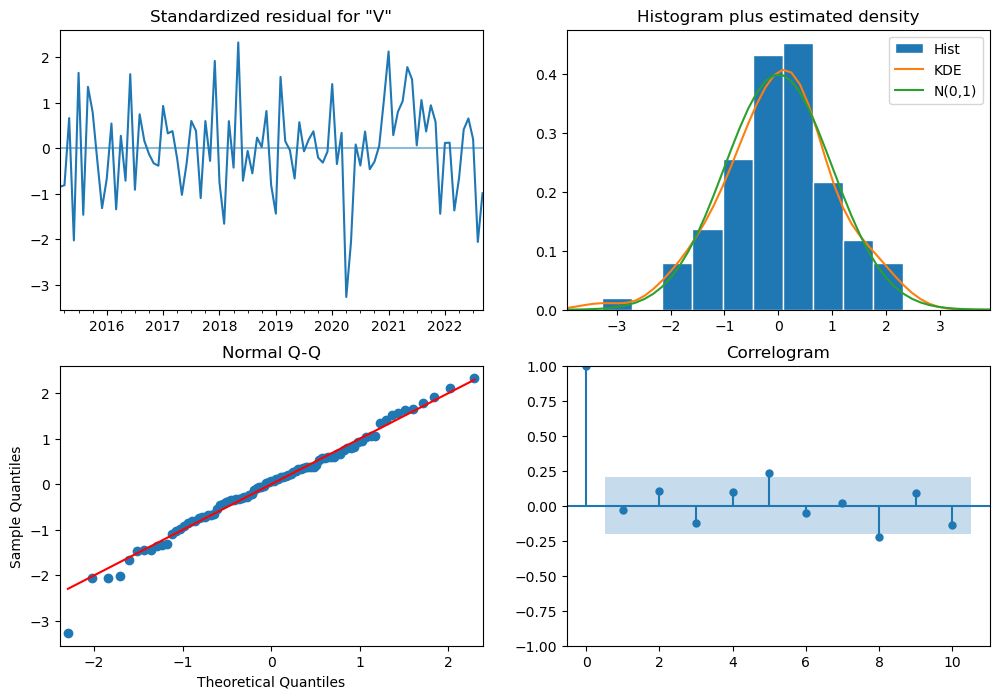

In [179]:
sarima_result.plot_diagnostics(figsize=(12,8));
plt.show()